In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pygsp import graphs, filters, plotting
from numpy import pi
import ephem
#from geopy.geocoders import Nominatim
#geolocator = Nominatim()
from tqdm import tqdm
import reverse_geocoder as rg
from collections import Counter

In [2]:
#data = pd.read_csv('Dataset/satellites_in_orbit_info.csv')
#
#matrix = np.zeros([len(data),len(data)])
#
#for i in range(len(data)):
#    for j in range(i,len(data)):
#        if data['COUNTRY'][i] == data['COUNTRY'][j]:
#            matrix[i,j] = 1
#            matrix[j,i] = 1
# ATTENTION : ENV 1H20 DE COMPUTE
#
#trouduc = np.load('adjacencymatrix.npy')
#
#
#plt.spy(trouduc)

In [3]:
tle = open('Dataset/satellite_tle_current.txt')
lines = tle.readlines()

In [4]:
numb_element = len(lines)
names = []
long = []
lat = []
elevation_km = []
for i in range(0,numb_element-1,3):
    temp = ephem.readtle(lines[i], lines[i+1], lines[i+2])
    temp.compute('2017/10/12')
    try:
        long.append(temp.sublong*180/pi)
        lat.append(temp.sublat*180/pi)
        elevation_km.append(temp.elevation/1000)
        names.append(temp.name[2:])
    except:
        print('Index number {} is not compatible to perform computation' .format(i))

Index number 5361 is not compatible to perform computation
Index number 49563 is not compatible to perform computation


In [5]:
data = pd.DataFrame(np.transpose([names,long,lat,elevation_km]))
data.columns = ['Names','Longitude [°]','Latitude [°]','Elevation [km]']
data.set_index('Names',inplace=True)

In [6]:
coord = list(zip(lat,long))
result = rg.search(coord)
countries = [temp['cc'] for temp in result]
data['Country'] = countries

Loading formatted geocoded file...


In [7]:
data

,Longitude [°],Latitude [°],Elevation [km],Country
Names,,,,
VANGUARD 1,-63.01315328238157,-26.65173623575367,950.1053125,AR
VANGUARD 2,33.607191075144456,-32.25819456312109,2825.77825,ZA
VANGUARD R/B,158.90670062542114,1.4622271746404283,746.4226875,FM
VANGUARD R/B,-117.00344908625789,12.395302654786787,2056.953375,MX
VANGUARD 3,-14.979412519707317,-30.811335100669776,3271.14,SH
EXPLORER 7,165.9903034740197,9.845133707399345,517.82565625,MH
TIROS 1,-49.25634633165384,48.00799948723977,649.5704375,CA
TRANSIT 2A,-139.31569634983023,38.87243705724013,970.6335,US
SOLRAD 1 (GREB),-0.5891223854904057,-47.06758489136657,745.2826875,SH


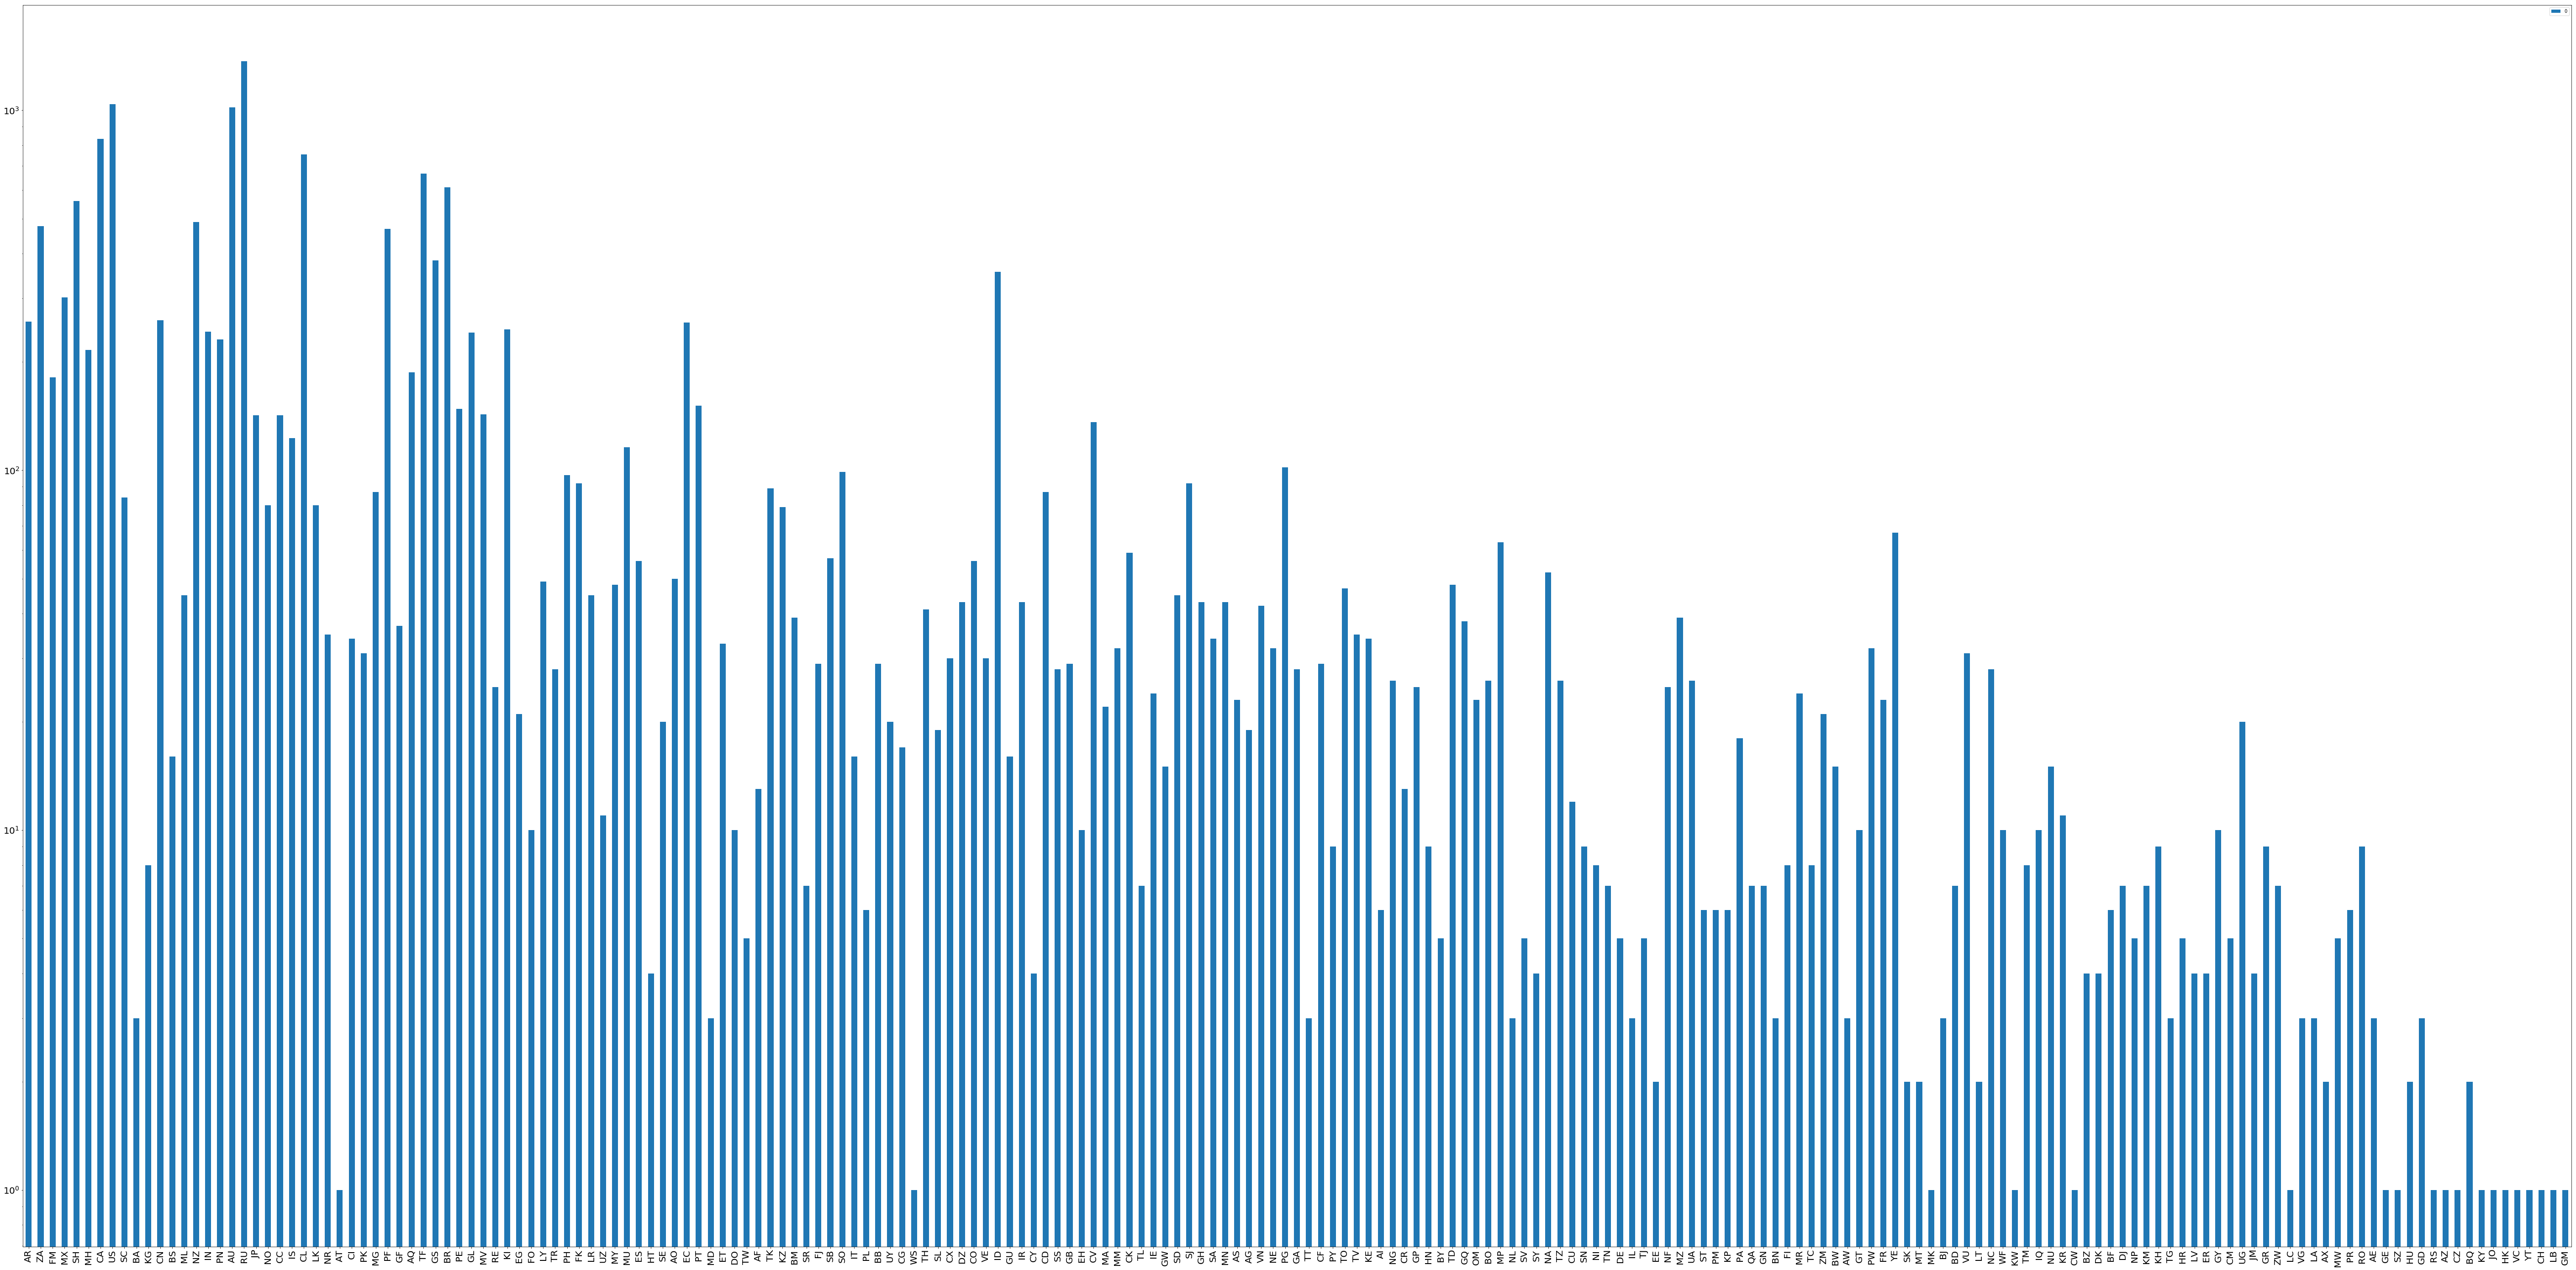

In [8]:
letter_counts = Counter(data['Country'])
df = pd.DataFrame.from_dict(letter_counts, orient='index')
df.plot(kind='bar',figsize=(100,50),logy=True,fontsize=20)